# Data Analysis


**Who**
All individual donors who gave to the c3 recorded in NGP, minus monthly donors. We have  
We’re working with 2,329 donors in this analysis.

**Approach**
This is what I would call an “exploratory data analysis.” My goal here was to simply understand or donor data and start asking questions. Like every good analysis, I wound up with more questions than I was able to answer.   

**I started my analysis by asking the questions:**  
How many of our donors give below \\$100? Below \\$500? Below \\$1,000?  
What’s the average lifetime value of our donors?  
How many of our donors give once and then never again?  
Who loves us the most (donors with the most gifts)?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
datetime.datetime.strptime

%matplotlib inline

In [2]:
data = pd.read_csv("data/historical_data.csv")
data.head()

,Contact Name,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
0,4112,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
1,1966,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
2,4716,NaN,VNW16E3PPR3,2015-12-22,2500.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGJ1973
3,4793,NaN,VNW16CGFH74,2008-02-07,21.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH3992
4,1932,NaN,VNW16CGDHA2,2007-03-21,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH2VW2


## Liftime Value

In [3]:
donors_by_lifetime = data.groupby([' Contact Name'])['Amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
Contact Name,
4421,301000.0
5780,50000.0
673,50000.0
6974,35500.0
6980,35000.0
813,35000.0
1456,26100.0
5906,25000.0
3058,25000.0


### Distribution of Lifetime Values

In [4]:
donors_100_1000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 100) & (donors_by_lifetime["lifetime_amount"] <= 1000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


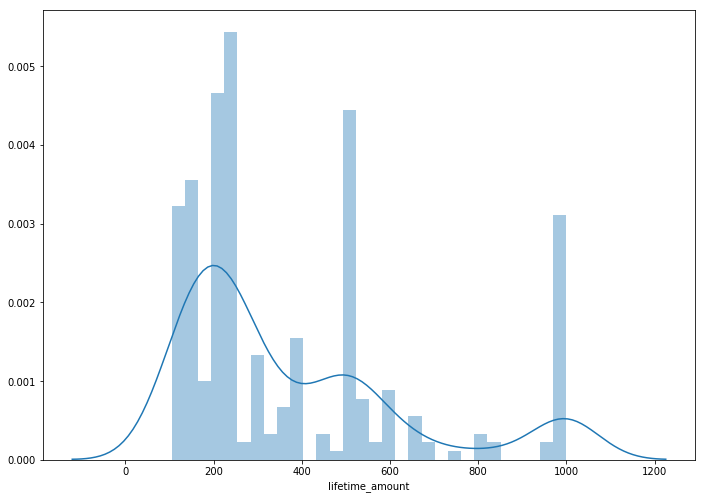

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_100_1000['lifetime_amount'], bins = 30)

In [6]:
donors_900_10000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 900) & (donors_by_lifetime["lifetime_amount"] <= 10000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


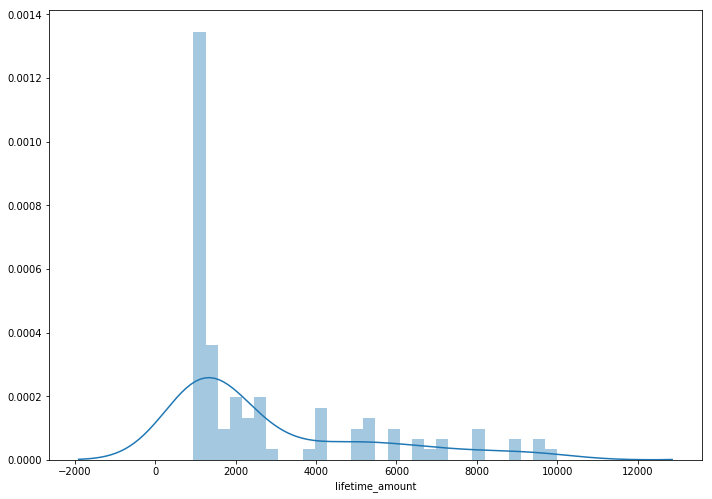

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_900_10000['lifetime_amount'], bins = 30)

## Quick Check on Lifetime Amounts  

7.5% of donors have a lifetime value of \\$1,000 or more and make up 88.3\% of our total revenue.

This means that 92.5\% of our donors are small dollar donors, and make up 16\% of our total revenue. Given the 80/20 rule, these numbers make sense.

In [8]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.074952
dtype: float64

In [9]:
total_major_donors = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)].lifetime_amount.sum()
total = donors_by_lifetime.lifetime_amount.sum()
total_major_donors/total

0.88346208882523

## Checking for Repeat Donors  

How many of our donors only give once? How many gifts does someone give before they lapse?

In [10]:
by_gifts = data.groupby([' Contact Name']).size().sort_values(ascending = False).to_frame()
by_gifts.columns = ['number_of_gifts']
by_gifts.head()

,number_of_gifts
Contact Name,
1365,12
530,12
4543,11
482,11
417,10


## Repeat Donors
76\% of our donors have given only once. This isn't our exact retention rate, because it doesn't take into account time. 

In [11]:
only_once = by_gifts.loc[by_gifts['number_of_gifts'] == 1]
len(only_once)/len(by_gifts)

0.7616912235746316

In [12]:
repeat_donors = by_gifts.loc[by_gifts['number_of_gifts'] != 1]


Let's take a look at some summary statistics. The average number a gift someone gives is 3, with a median of 2. Most of the data fall within the range of 2 to 4 gifts. I wonder how these stats would change when we separate out small dollar donors from major donors.

In [13]:
repeat_donors.describe()

,number_of_gifts
count,372.000000
mean,3.201613
std,1.801376
min,2.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,12.000000


In [14]:
np.median(repeat_donors.number_of_gifts)

2.0

## Differences between small and major donors

In [15]:
# separate out major and small donors into two dataframes
major = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)]
small = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] < 1000)]

In [17]:
# locate the donors in the dataframe with individual transcations
i1 = data[" Contact Name"]
i2 = major.index
major = data[i1.isin(i2)]

In [18]:
# locate the donors in the dataframe with individual transcations
i1 = data[" Contact Name"]
i2 = small.index
small = data[i1.isin(i2)]

In [22]:
# major gifts by number of gifts
major_by_gifts = major.groupby([' Contact Name']).size().sort_values(ascending = False).to_frame()
major_by_gifts.columns = ['number_of_gifts']
major_by_gifts.head(10)

,number_of_gifts
Contact Name,
1365,12
530,12
482,11
3454,10
5848,9
6290,9
2357,8
3818,8
3058,8


In [34]:
#small gifts by number of gifts
small_by_gifts = small.groupby([' Contact Name']).size().sort_values(ascending = False).to_frame()
small_by_gifts.columns = ['number_of_gifts']


In [24]:
small_by_gifts["type"] = "small"
major_by_gifts["type"] = "major"
all_gifts = pd.concat([small_by_gifts, major_by_gifts])

We see below that most small dollar donors only give a few number of times (primarily only one gift), while major donors have a larger spread, ranging primarily from 1 to 5 gifts.

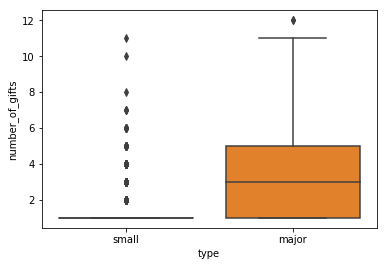

In [30]:
sns.boxplot(x = "type", y = "number_of_gifts", data = all_gifts)

Below we see that we have 1,444 small dollar donors and 117 major donors. Small dollar donors on average give 1.3 gifts, while major donors on average give 3.5 gifts. We clearly see that most small dollar donors usually give only once. This tells me that there is room for imporvement in our retention rate for small dollar donors.

In [36]:
all_gifts.loc[all_gifts["type"] == "small"].describe()

,number_of_gifts
count,1444.000000
mean,1.360111
std,0.935458
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


In [37]:
all_gifts.loc[all_gifts["type"] == "major"].describe()

,number_of_gifts
count,117.000000
mean,3.555556
std,2.614431
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,12.000000
